<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/EXAM/%D0%95%D0%BA%D0%B7%D0%B0%D0%BC%D0%B5%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основні умови

Студент обирає **одне завдання** на вибір, або узгоджує власний проект з викладачем. Студент повен показати розуміння роботи з даними та побудови моделі.

Студент самостійно пише увесь код до початку екзамену. Під час екзамену кожен студент презентує свою роботу викладачу та відповідає на основні питання, що стосуються проекту, також можуть бути додаткові питання на кристалики\більші бали.

Робота повинна бути оформлена як готовий код, який на прохання викладача можна буде запустити або внести певні зміни. На вибір студента можна використовувати Colab чи Kaggle

# Завдання 1

## [Дані](https://www.kaggle.com/datasets/antongalysh/itstep-exam/data)

Дані про пацієнтів лікарні. Опис даних:
* *case_id:* Ідентифікатор випадку, зареєстрованого в лікарні
* *Hospital_code:* Унікальний код лікарні
* *Hospital_type_code:* Унікальний код типу лікарні
* *City_Code_Hospital:* Код міста, в якому знаходиться Лікарня
* *Hospital_region_code:* Код країни, в якій знаходиться лікарня
* *country_code:* Код області, в якій знаходиться лікарня
* *Available Extra Rooms in Hospital:* Кількість додаткових палат, доступних у лікарні
* *Department:* Відділення, в якому знаходиться пацієнт
* *Ward_Type:* Код типу палати
* *Ward_Facility_Code:* Код приміщення для палати
* *Bed Grade:* Стан ліжка в палаті
* *patientid:* Унікальний ідентифікатор пацієнта
* *doctorid:* Унікальний ідентифікатор лікаря
* *City_Code_Patient:* Код міста для пацієнта
* *Type of Admission:* Тип госпіталізації, зареєстрований лікарнею
* *Severity of Illness:* Тяжкість захворювання, зафіксована на момент госпіталізації
* *Visitors with Patient:* Кількість відвідувачів з пацієнтом
* *Age:* Вік пацієнта
* *Admission_Deposit:* Депозит при госпіталізації
* *Stay:* Дні перебування пацієнта в стаціонарі(цільова ознака)


## Умова

**Тип задачі**

Модель повинна спрогнозувати кількість днів, які пацієнт провів у лікарні. Вам потрібно розв'язати цю задачу як задачу класифікації(спрогнозувати діапазон днів) та задачу регресії(спрогнозувати саму кількість днів), у випадку задачі регресії вам потрібно згенерувати нову цільову ознаку Stay_Days на основі Stay, як середнє значення діапазону.

При тренуванні моделей у вас може бути лише одина ознака Stay_Days чи Stay

**Провести попередній аналіз даних**
* ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків
* перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити
* перевірити дані на наявність викидів, при необхідності створити **нові дані** без викидів
* вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
  1. чи видно викиди
  2. скільки є піків
  3. чи зміщенна гістограма вліво\вправо
* вивести ящики з вусами для числових ознак, дати опис ящикам:
  1. в якому діапазоні зосереджено 25%\50%\75%\100% даних
  2. чи є викиди
  3. чи зміщені ящики вліво\вправо
* вивести гістограми з кількостями для категоріальних ознак
* вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме
* вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність

**Побудова моделі для задач класифікації та регресії**
* при необхідності згенерувати нові ознаки
* самостійно обрати модель для тренування або обрати за допомогою `optuna`
* розділити **дані без викидів** на тренувальні та тестові, можливо валідаційні якщо потрібно
* вибрати метрики для оцінки якості моделі, вибір пояснити
* побудувати препроцесор
* натренувати модель
* вивести метрики для тестових даних, дати оцінку якості моделі
* зберегти натреновану модель

**Додатково**
* порівняти результат моделі на неочищених від викидів даних
* застосувати підбір гіперпараметрів

# Попередній аналіз даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Завантаження даних

In [ ]:
data = pd.read_csv("data-4.csv")
data.head()

### Ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків

In [ ]:
data.dtypes

In [ ]:
data.shape

### Перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити

In [ ]:
data.isnull().sum()

Після перевірки даних на пропущення значнь, можна стверджувати, що стовпець doctorid потрібно видалити, так як він має близько 99% пропущених даних. Решту даних ми залишаємо

In [ ]:
data = data.drop(columns=["doctorid"], inplace=False)
data.head()

### Перевірити дані на наявність викидів, при необхідності створити нові дані без викидів

In [ ]:
def outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Виявлення викидів для кожної числової ознаки
outliers = {}
for col in data.select_dtypes(include=["number"]).columns:
    outliers[col] = outliers_iqr(data, col)

# Виведення кількості викидів для кожної ознаки
for col, out in outliers.items():
    print(f'Кількість викидів у {col}: {len(out)}')

Ми бачимо, що деякі кількісні дані мають викиди,тому проведемо видалення викидів.

In [ ]:
new_data = data.copy()

for col in data.select_dtypes(include=["number"]).columns:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_data = new_data[(new_data[col] >= lower_bound) & (new_data[col] <= upper_bound)]

# Перевірка розмірів початкових даних та даних без викидів
print(f'Початковий розмір даних: {data.shape}')
print(f'Розмір даних без викидів: {new_data.shape}')

In [ ]:
data = new_data
data.shape

In [ ]:
data.head()

### Вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
* чи видно викиди
* скільки є піків
* чи зміщенна гістограма вліво\вправо

In [ ]:
max_bins = int(np.sqrt(data.shape[0]))

print(f"Кількість бінів для гістограм: {max_bins}")

In [ ]:
fig, axes = plt.subplots(len(data.select_dtypes(include=["number"]).columns), 1, figsize=(10, 40))

for i, col in enumerate(data.select_dtypes(include=["number"]).columns):
    ax = axes[i]
    bins = min(data[data.select_dtypes(include=["number"]).columns].nunique()[col], max_bins)
    sns.histplot(data[col], bins=bins, ax=ax)
    ax.set_title(f"Гісторрама {col} з {bins} стовпцями")
    ax.set_xlabel(col)
    ax.set_ylabel("Кількість")

plt.tight_layout()
plt.show()

З даних графіків можемо сказати, що більшість даних не мають викидів, тому що в попередньому етапі було їхнє вданалення. Частина грфіків симетрична, а деякі мають зміження або вліво або вправо. Кількість бінів дорівнює кільксті унікальних значень даних

### Вивести ящики з вусами для числових ознак, дати опис ящикам:
* в якому діапазоні зосереджено 25%\50%\75%\100% даних
* чи є викиди
* чи зміщені ящики вліво\вправо


Unnamed: 0:
Кількість даних у 25% квантилі: 67051
Кількість даних у 50% квантилі: 67051
Кількість даних у 75% квантилі: 67051
Кількість даних у 100% квантилі: 67052

case_id:
Кількість даних у 25% квантилі: 67051
Кількість даних у 50% квантилі: 67051
Кількість даних у 75% квантилі: 67051
Кількість даних у 100% квантилі: 67052

Hospital_code:
Кількість даних у 25% квантилі: 68766
Кількість даних у 50% квантилі: 65468
Кількість даних у 75% квантилі: 76176
Кількість даних у 100% квантилі: 53297

City_Code_Hospital:
Кількість даних у 25% квантилі: 42775
Кількість даних у 50% квантилі: 63095
Кількість даних у 75% квантилі: 71460
Кількість даних у 100% квантилі: 44252

Available Extra Rooms in Hospital:
Кількість даних у 25% квантилі: 87502
Кількість даних у 50% квантилі: 77792
Кількість даних у 75% квантилі: 77778
Кількість даних у 100% квантилі: 25119

Bed Grade:
Кількість даних у 25% квантилі: 107194
Кількість даних у 50% квантилі: 91362
Кількість даних у 75% квантилі: 0
Кількість даних 

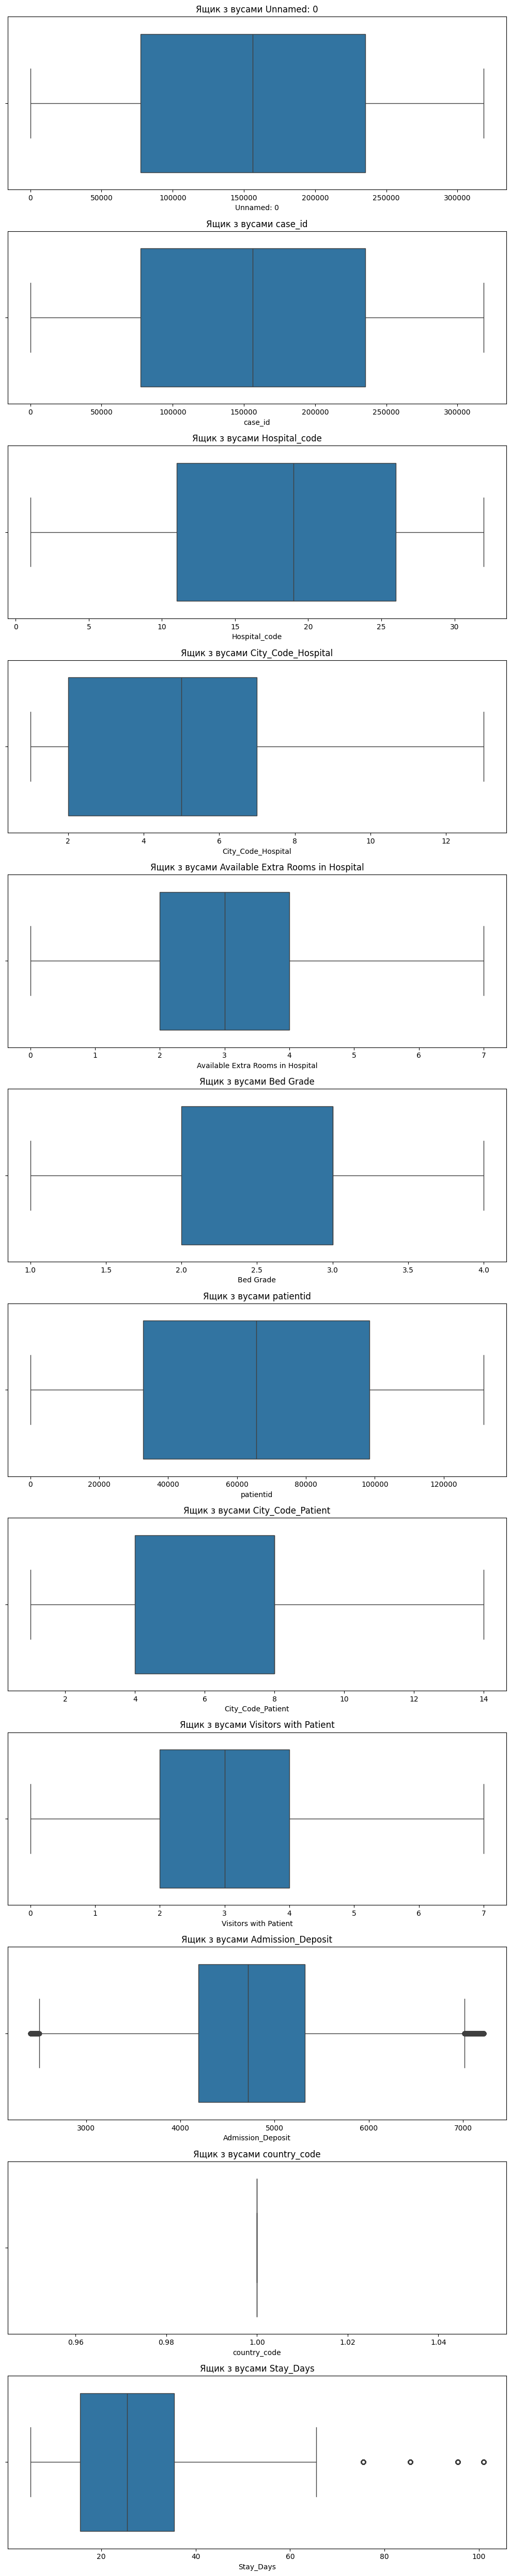

In [57]:
fig, axes = plt.subplots(len(data.select_dtypes(include=["number"]).columns), 1, figsize=(10, 50))

for i, col in enumerate(data.select_dtypes(include=["number"]).columns):
    ax = axes[i]
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f"Ящик з вусами {col}")
    ax.set_xlabel(col)

    # Кількість даних у квантилях
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.5)
    Q3 = data[col].quantile(0.75)
    min = data[col].min()
    max = data[col].max()

    num = len(data[col])
    q_25 = len(data[(data[col] > min) & (data[col] <= Q1)])
    q_50 = len(data[(data[col] > Q1) & (data[col] <= Q2)])
    q_75 = len(data[(data[col] > Q2) & (data[col] <= Q3)])
    q_100 = len(data[(data[col] > Q3) & (data[col] <= max)])

    print(f'\n{col}:')
    print(f'Кількість даних у 25% квантилі: {q_25}')
    print(f'Кількість даних у 50% квантилі: {q_50}')
    print(f'Кількість даних у 75% квантилі: {q_75}')
    print(f'Кількість даних у 100% квантилі: {q_100}')
plt.tight_layout()
plt.show()

Unnamed: 0:
- Кількість даних у 25% квантилі: 67051
- Кількість даних у 50% квантилі: 67051
- Кількість даних у 75% квантилі: 67051
- Кількість даних у 100% квантилі: 67052
- Викиди відсутні
- Зміщень немає

case_id:
- Кількість даних у 25% квантилі: 67051
- Кількість даних у 50% квантилі: 67051
- Кількість даних у 75% квантилі: 67051
- Кількість даних у 100% квантилі: 67052
- Викиди відсутні
- Зміщень немає


Hospital_code:
- Кількість даних у 25% квантилі: 68766
- Кількість даних у 50% квантилі: 65468
- Кількість даних у 75% квантилі: 76176
- Кількість даних у 100% квантилі: 53297
- Викиди відсутні
- Трохи зміжений вправо

City_Code_Hospital:
- Кількість даних у 25% квантилі: 42775
- Кількість даних у 50% квантилі: 63095
- Кількість даних у 75% квантилі: 71460
- Кількість даних у 100% квантилі: 44252
- Викиди відсутні
- Зміщений вліво

Available Extra Rooms in Hospital:
- Кількість даних у 25% квантилі: 87502
- Кількість даних у 50% квантилі: 77792
- Кількість даних у 75% квантилі: 77778
- Кількість даних у 100% квантилі: 25119
- Викиди відсутні
- Трохи зміжений вліво

Bed Grade:
- Кількість даних у 25% квантилі: 107194
- Кількість даних у 50% квантилі: 91362
- Кількість даних у 75% квантилі: 0
- Кількість даних у 100% квантилі: 46422
- Викиди відсутні
- Зміщень немає

patientid:
- Кількість даних у 25% квантилі: 67051
- Кількість даних у 50% квантилі: 67048
- Кількість даних у 75% квантилі: 67052
- Кількість даних у 100% квантилі: 67051
- Викиди відсутні
- Зміщень немає

City_Code_Patient:
- Кількість даних у 25% квантилі: 53808
- Кількість даних у 50% квантилі: 161459
- Кількість даних у 75% квантилі: 0
- Кількість даних у 100% квантилі: 28738
- Викиди відсутні
- Зміщений вліво

Visitors with Patient:
- Кількість даних у 25% квантилі: 121856
- Кількість даних у 50% квантилі: 51648
- Кількість даних у 75% квантилі: 68740
- Кількість даних у 100% квантилі: 25946
- Викиди відсутні
- Зміщений вліво

Admission_Deposit:
- Кількість даних у 25% квантилі: 67088
- Кількість даних у 50% квантилі: 67100
- Кількість даних у 75% квантилі: 66998
- Кількість даних у 100% квантилі: 67019
- Викиди присутні
- Трохи зміщений вправо

country_code:
- Кількість даних у 25% квантилі: 0
- Кількість даних у 50% квантилі: 0
- Кількість даних у 75% квантилі: 0
- Кількість даних у 100% квантилі: 0
- Викиди відсутні
- Зміщень немає

### Вивести гістограми з кількостями для категоріальних ознак

In [ ]:
fig, axes = plt.subplots(len(data.select_dtypes(include=["object", "category"]).columns), 1, figsize=(10, 50))

for i, col in enumerate(data.select_dtypes(include=["object", "category"]).columns):
    ax = axes[i]
    sns.countplot(x=data[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме

Для правильного вибору залежних даних використаємо аналіз варіацій(ANOVA)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=(['object', 'category'])).columns

def anova_test(numerical_feature, categorical_feature, data):
    categories = data[categorical_feature].unique()
    groups = [data[data[categorical_feature] == category][numerical_feature].dropna() for category in categories]
    anova_result = f_oneway(*groups)

    return numerical_feature, categorical_feature, anova_result.statistic, anova_result.pvalue

results = []

for num_col in numerical_columns:
    for cat_col in categorical_columns:
        result = anova_test(num_col, cat_col, data)
        results.append(result)

for numerical_feature, categorical_feature, f_statistic, p_value in results:
    print(f'Результат тесту ANOVA для {numerical_feature} залежно від {categorical_feature}:')
    print(f'F-статистика: {f_statistic}, p-значення: {p_value}')
    if p_value < 0.05:
        print(f'{numerical_feature} значно залежить від {categorical_feature} (відхиляємо H0)')
    else:
        print(f'{numerical_feature} не значно залежить від {categorical_feature} (не відхиляємо H0)')
    print('-' * 50)

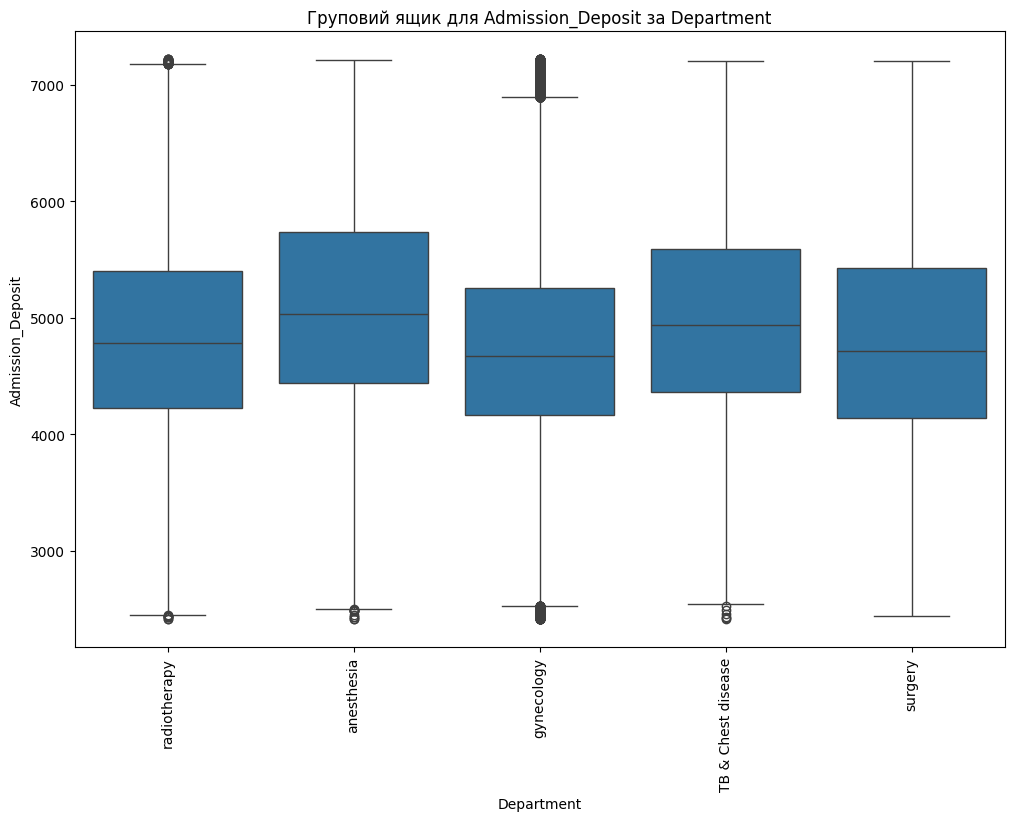

In [58]:
numerical_feature = "Admission_Deposit"
categorical_feature = "Department"

plt.figure(figsize=(12, 8))
sns.boxplot(x=data[categorical_feature], y=data[numerical_feature])
plt.title(f"Груповий ящик для {numerical_feature} за {categorical_feature}")
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.xticks(rotation=90)
plt.show()

Спочатку ми провели тест ANOVA щоб знайти залежність між даними, але якщо відхили наші результати, а лише робити припущення, то зв'язок дійсно має бути, так як депозити при госпіталізації можуть значно варіюватися залежно від відділення через різну вартість процедур, використання обладнання, рівень кваліфікації персоналу, тощо.

#### Для всіх по всіх

In [ ]:
# numerical_columns = data.select_dtypes(include=["number"]).columns
# categorical_columns = data.select_dtypes(include=["object", "category"]).columns

# numerical_columns, categorical_columns

In [ ]:
# for num_col in numerical_columns:
#     for cat_col in categorical_columns:
#         plt.figure(figsize=(12, 8))
#         sns.boxplot(x=data[cat_col], y=data[num_col])
#         plt.title(f'Ящик з вусами за {num_col} для {cat_col}')
#         plt.xlabel(cat_col)
#         plt.ylabel(num_col)
#         plt.xticks(rotation=90)
#         plt.show()

### Вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність

In [ ]:
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[col1], y=data[col2])
        plt.title(f'Точкова діаграма для {col1} та {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

In [ ]:
correlation_matrix = data[numerical_columns].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Матриця кореляції для числових ознак')
plt.show()

На матриці кореляції наведено залежність числових ознак

# Побудова моделі для задач класифікації та регресії

## Генеруція нової цільової ознаки Stay_Days на основі Stay, як середнє значення діапазону

In [ ]:
data["Stay"].head()

In [ ]:
def calculate_mean_days(stay_range):
    if stay_range == 'More than 100 Days':
        return 101 # Більше 100 днів
    days = stay_range.split('-')
    return (int(days[0]) + int(days[1])) / 2

data['Stay_Days'] = data['Stay'].apply(calculate_mean_days)

data[['Stay', 'Stay_Days']].head()

## Лінійна регресія

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

target_regression = 'Stay_Days'

### Визначення числових і категоріальних ознак

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.drop(['Stay_Days'])
categorical_features = data.select_dtypes(include=['object', 'category']).columns.drop(['Stay'])

### Розділення даних

In [ ]:
X = data.drop(columns=[target_regression, 'Stay'])
y_regression = data[target_regression]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.8, random_state=42)

### Побудова та тренування лінійної регресії

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Побудова препроцесора

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preprocessor

### Побудова моделі регресії

In [ ]:
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
reg_pipeline

### Тренування моделі регресії

In [ ]:
reg_pipeline.fit(X_train_reg, y_train_reg)

### Оцінка якості моделі регресії

Середньоквадратична помилка (Mean Squared Error, MSE)

- Опис: MSE вимірює середнє квадратичне відхилення прогнозованих значень від фактичних значень. Вона сильно штрафує великі відхилення, оскільки квадрат різниці збільшує вплив великих помилок.
- Використання: MSE використовується для оцінки точності регресійної моделі. Низьке значення MSE вказує на те, що прогнозовані значення близькі до фактичних значень.

R-квадрат (R-squared)

- Опис: R-квадрат, також відомий як коефіцієнт детермінації, вимірює частку варіації у вихідних даних, яку може пояснити модель. Значення R-квадрат варіюється від 0 до 1, де 1 означає, що модель повністю пояснює варіацію у вихідних даних.
- Використання: R-квадрат показує, наскільки добре модель пояснює залежність вихідних даних від вхідних змінних. Високе значення R-квадрат вказує на те, що модель добре підходить для даних.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = reg_pipeline.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Метрики для регресійної моделі:')
print(f'MSE: {mse}')
print(f'R-квадрат: {r2}')

- Середньоквадратична помилка (MSE): Вимірює середнє квадратичне відхилення прогнозованих значень від фактичних значень. Використовується для оцінки точності моделі.
- R-квадрат (R-squared): Вимірює частку варіації, яку може пояснити модель. Використовується для оцінки того, наскільки добре модель підходить для даних.

Загалом модель вийшла не дуже, тому щоб покращити метрики використаємо оптимізацію гіперпараметрів

### Налаштування гіперпараметрів для GridSearchCV

In [ ]:
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__positive': [True, False]
}

param_grid

### Використання GridSearchCV для пошуку найкращих гіперпараметрів

In [ ]:
grid_search = GridSearchCV(reg_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

### Тренування моделі з GridSearchCV

In [ ]:
grid_search.fit(X_train_reg, y_train_reg)

### Найкращі гіперпараметри

In [ ]:
best_params = grid_search.best_params_
print(f'Найкращі гіперпараметри: {best_params}')

### Найкраща модель

In [ ]:
best_model = grid_search.best_estimator_

### Оцінка моделі з оптимізованими гіперпараметрами

In [ ]:
y_pred_reg = best_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Метрики для оптимізованої регресійної моделі:')
print(f'MSE: {mse}')
print(f'R-квадрат: {r2}')

### Збереження моделі лінійної регресії

In [ ]:
import joblib

joblib.dump(reg_pipeline, 'regression_model.pkl')
joblib.dump(best_model, 'optimized_regression_model.pkl')

## Класифікація

In [59]:
target_classification = 'Stay'

### Розділення даних

In [ ]:
X = data.drop(columns=[target_classification, 'Stay_Days'])
y_classification = data[target_classification]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.8, random_state=42)

### Побудова та тренування моделі класифікації

In [ ]:
from sklearn.linear_model import LogisticRegression

### Побудова моделі класифікації

In [ ]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
clf_pipeline

### Тренування моделі класифікації

In [ ]:
clf_pipeline.fit(X_train_clf, y_train_clf)

- Точність (Accuracy): Хороша для загальної оцінки моделі, коли класи збалансовані.
- F1-міра (F1-score): Корисна, коли класи незбалансовані або коли важливо враховувати як помилкові позитивні, так і помилкові негативні прогнози.

### Оцінка якості моделі класифікації

Точність (Accuracy)

- Опис: Точність вимірює частку правильних прогнозів серед загальної кількості прогнозів.
- Використання: Точність є базовою метрикою, яка добре працює, коли класи є збалансованими. Вона показує, як часто модель робить правильні передбачення.

F1-міра (F1-score)

- Опис: F1-міра є середньозваженим гармонійним середнім точності (precision) і повноти (recall). Вона використовується, коли важливо враховувати як кількість правильно передбачених позитивних прикладів, так і кількість помилково пропущених позитивних прикладів.
- Використання: F1-міра корисна, коли класи незбалансовані або коли важливіше враховувати як помилкові позитивні, так і помилкові негативні прогнози.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_clf = clf_pipeline.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f'Метрики для класифікаційної моделі:')
print(f'Точність: {accuracy}')
print(f'F1-міра: {f1}')

- Точність (Accuracy): Хороша для загальної оцінки моделі, коли класи збалансовані.
- F1-міра (F1-score): Корисна, коли класи незбалансовані або коли важливо враховувати як помилкові позитивні, так і помилкові негативні прогнози.

### Збереження моделі класифікації

In [ ]:
joblib.dump(clf_pipeline, 'clasification_model.pkl')

### Покращення значень

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
import joblib

In [ ]:
target_classification = 'Stay'

numerical_features = data.select_dtypes(include=['number']).columns.drop(['Stay_Days'])
categorical_features = data.select_dtypes(include=['object', 'category']).columns.drop(['Stay'])

X = data.drop(columns=[target_classification, 'Stay_Days'])
y_classification = data[target_classification]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preprocessor

In [ ]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
clf_pipeline

In [56]:
clf_pipeline.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'country_code'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [60]:
y_pred_clf = clf_pipeline.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f'Метрики для класифікаційної моделі:')
print(f'Точність: {accuracy}')
print(f'F1-міра: {f1}')

Метрики для класифікаційної моделі:
Точність: 0.41847805823794787
F1-міра: 0.37368302280465654


Бачимо, що використання градієнтного бустингу покращило результати. Тепер підберемо гіперпараметри

In [61]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
param_grid

{'classifier__n_estimators': [100, 200, 300],
 'classifier__learning_rate': [0.01, 0.1, 0.2],
 'classifier__max_depth': [3, 4, 5],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__min_samples_leaf': [1, 2, 4]}

In [62]:
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [ ]:
grid_search.fit(X_train_clf, y_train_clf)

#### Найкращі гіперпараметри

In [ ]:
best_params = grid_search.best_params_
print(f'Найкращі гіперпараметри: {best_params}')

### Найкраща модель

In [ ]:
best_model = grid_search.best_estimator_

 ### Оцінка моделі з оптимізованими гіперпараметрами

In [ ]:
y_pred_clf = best_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f'Метрики для оптимізованої класифікаційної моделі:')
print(f'Точність: {accuracy}')
print(f'F1-міра: {f1}')

joblib.dump(best_model, 'optimized_classification_model.pkl')